# **Exploring the Impact of Fixed vs. Flexible Schedules on Student Productivity, Academic Success, and Satisfaction**
This notebook contains statistical analysis of survey responses from 185 students to explore how different scheduling styles influence key aspects of student life.


## **1. Imports**

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## **2. Load Dataset**

In [67]:
df = pd.read_csv("/content/Exploring the Impact of Fixed vs. Flexible Schedules on Student Productivity, Academic Success, and Satisfaction (Responses) - Form Responses 1.csv")
df.head(5)

,Timestamp,Email Address,1. What is your age?,2. What is your gender?,3. Occupation,4. How do you usually schedule your daily tasks?,5. How satisfied are you with your current scheduling method?,6. How often do you have control over adjusting your schedule?,7. Do you prefer fixed or flexible schedules?,8. How do you usually plan your schedule?,9. How effective do you find your current scheduling method?,10. How productive do you feel with your current schedule?,11. How often do you feel overwhelmed by your workload?,12. How satisfied are you with your performance?,13. How satisfied are you with your work-life balance?,14. How often does your schedule allow you to maintain a healthy lifestyle (like following a proper diet)?,15. How often does your schedule allow you to engage in regular physical exercise?,16. Which better suit your professional and personal needs?,17. Do you find AI tools helpful in scheduling your day,18. How important is scheduling flexibility to your success and satisfaction?
0,3/18/2025 20:13:19,itxlevicodez@gmail.com,18-23,Male,Student,"Sometimes, depending on my workload",Unsatisfied,Rarely (I can adjust in special cases),Flexible,No formal planning,Ineffective,Somewhat Productive,Always,Very unsatisfied,Very Unsatisfied,Rarely,Rarely,Hybrid(Combination of Fixed and Flexible),Haven't tried yet,Extremely important
1,3/18/2025 20:21:41,alvinajavaid0505@gmail.com,18-23,Female,Student,I only schedule goal-oriented tasks (like assi...,Unsatisfied,Rarely (I can adjust in special cases),Fixed,Creating daily to-do lists.,Ineffective,Somewhat Productive,Often,Unsatisfied,Unsatisfied,Sometimes,Rarely,Fixed Schedule,Yes,Somewhat important
2,3/18/2025 20:23:18,fatimamohsin627@gmail.com,18-23,Female,Student,"Sometimes, depending on my workload",Unsatisfied,Often (I have some flexibility most days),Flexible,No formal planning,Ineffective,Moderately Productive,Often,Unsatisfied,Satisfied,Sometimes,Rarely,Flexible Schedule,"Somewhat, but I still prefer manual scheduling...",Extremely important
3,3/18/2025 20:35:55,mazharsmmughal@gmail.com,18-23,Male,Student,"Sometimes, depending on my workload",Very Satisfied,Always (I can adjust my schedule anytime),Hybrid (Combination of Fixed and Flexible),No formal planning,Very Effective,Highly Productive,Sometimes,Very Satisfied,Very Satisfied,Rarely,Never,Hybrid(Combination of Fixed and Flexible),Haven't tried yet,Not important at all
4,3/18/2025 20:37:02,roshaantanveer492@gmail.com,18-23,Male,Student,I don’t schedule my tasks,Satisfied,Always (I can adjust my schedule anytime),Hybrid (Combination of Fixed and Flexible),No formal planning,Effective,Moderately Productive,Sometimes,Unsatisfied,Satisfied,Often,Never,Hybrid(Combination of Fixed and Flexible),Yes,Moderately important


## **3. Data Cleaning & Preprocessing**



In [68]:
df = df.drop(columns=['Timestamp', 'Email Address'], errors='ignore')

In [69]:
# Rename columns to simpler, consistent names
df.columns = [
    "age", "gender", "occupation", "schedule_type", "scheduling_satisfaction",
    "schedule_control", "preferred_schedule", "planning_method",
    "schedule_effectiveness", "productivity", "overwhelmed",
    "performance_satisfaction", "work_life_balance", "diet_healthy",
    "exercise_regular", "suitable_schedule_type", "ai_tool_use",
    "flexibility_importance"
]

# Map satisfaction levels to numeric (optional if already numeric)
satisfaction_map = {
    "Very Satisfied": 4, "Satisfied": 3,
    "Unsatisfied": 2, "Very Unsatisfied": 1
}

productivity_map = {
    "Highly Productive": 4,
    "Moderately Productive": 3,
    "Somewhat Productive": 2,
    "Not Productive at all": 1
}

# Mapping for schedule_effectiveness
effectiveness_map = {
    "Very Effective": 4,
    "Effective": 3,
    "Ineffective": 2,
    "Very ineffective": 1
}


# Apply mapping where needed
df["scheduling_satisfaction"] = df["scheduling_satisfaction"].map(satisfaction_map)
df["productivity"] = df["productivity"].map(productivity_map)
df["schedule_effectiveness"] = df["schedule_effectiveness"].map(effectiveness_map)

# Convert satisfaction to binary (1 = satisfied or very satisfied)
df["satisfied"] = df["scheduling_satisfaction"].isin([3, 4]).astype(int)

# Convert healthy to binary (1 = Often or Sometimes)
df["healthy"] = df["diet_healthy"].isin(["Often", "Sometimes","Always"]).astype(int)

# Drop rows with missing values in critical columns
df.dropna(subset=["productivity", "scheduling_satisfaction"], inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [70]:
df.sample(10)

,age,gender,occupation,schedule_type,scheduling_satisfaction,schedule_control,preferred_schedule,planning_method,schedule_effectiveness,productivity,overwhelmed,performance_satisfaction,work_life_balance,diet_healthy,exercise_regular,suitable_schedule_type,ai_tool_use,flexibility_importance,satisfied,healthy
25,18-23,Female,Student,I schedule both goal-oriented tasks and routin...,2,Often (I have some flexibility most days),Flexible,No formal planning,2,3,Often,Unsatisfied,Satisfied,Rarely,Sometimes,Hybrid(Combination of Fixed and Flexible),Haven't tried yet,Moderately important,0,0
102,18-23,Female,Student,I schedule both goal-oriented tasks and routin...,4,Often (I have some flexibility most days),Flexible,Creating daily to-do lists.,3,2,Often,Satisfied,Unsatisfied,Sometimes,Always,Flexible Schedule,"Somewhat, but I still prefer manual scheduling...",Moderately important,1,1
110,18-23,Female,Student,I schedule both goal-oriented tasks and routin...,3,Sometimes (I can adjust occasionally),Flexible,"Using a digital calendar (e.g., Google Calendar).",3,2,Often,Satisfied,Unsatisfied,Often,Sometimes,Flexible Schedule,"Somewhat, but I still prefer manual scheduling...",Somewhat important,1,1
122,18-23,Male,Student,"Sometimes, depending on my workload",2,Sometimes (I can adjust occasionally),Flexible,Creating daily to-do lists.,3,3,Often,Very Satisfied,Very Satisfied,Often,Rarely,Hybrid(Combination of Fixed and Flexible),Yes,Somewhat important,0,1
7,18-23,Male,Student,I don’t schedule my tasks,2,Always (I can adjust my schedule anytime),Hybrid (Combination of Fixed and Flexible),"Using a digital calendar (e.g., Google Calendar).",2,2,Often,Satisfied,Satisfied,Sometimes,Rarely,Hybrid(Combination of Fixed and Flexible),Haven't tried yet,Somewhat important,0,1
62,18-23,Male,Student,I only schedule goal-oriented tasks (like assi...,3,Always (I can adjust my schedule anytime),Flexible,No formal planning,3,3,Often,Very Satisfied,Satisfied,Always,Always,Flexible Schedule,"Somewhat, but I still prefer manual scheduling...",Somewhat important,1,1
164,18-23,Male,Student,I schedule both goal-oriented tasks and routin...,3,Sometimes (I can adjust occasionally),Flexible,"Using a digital calendar (e.g., Google Calendar).",3,2,Often,Satisfied,Satisfied,Sometimes,Often,Flexible Schedule,Haven't tried yet,Somewhat important,1,1
154,18-23,Male,Student,I schedule both goal-oriented tasks and routin...,4,Sometimes (I can adjust occasionally),Flexible,No formal planning,4,3,Sometimes,Very Satisfied,Satisfied,Often,Often,Flexible Schedule,"Somewhat, but I still prefer manual scheduling...",Moderately important,1,1
26,18-23,Female,Student,I don’t schedule my tasks,2,Sometimes (I can adjust occasionally),Hybrid (Combination of Fixed and Flexible),Writing in a physical notebook/planner,2,1,Rarely,Unsatisfied,Unsatisfied,Rarely,Rarely,Hybrid(Combination of Fixed and Flexible),Yes,Somewhat important,0,0
28,18-23,Female,Student,I only schedule goal-oriented tasks (like assi...,3,Often (I have some flexibility most days),Fixed,Creating daily to-do lists.,3,2,Often,Satisfied,Unsatisfied,Often,Often,Fixed Schedule,"Somewhat, but I still prefer manual scheduling...",Somewhat important,1,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       185 non-null    object
 1   gender                    185 non-null    object
 2   occupation                185 non-null    object
 3   schedule_type             185 non-null    object
 4   scheduling_satisfaction   185 non-null    int64 
 5   schedule_control          185 non-null    object
 6   preferred_schedule        185 non-null    object
 7   planning_method           185 non-null    object
 8   schedule_effectiveness    185 non-null    int64 
 9   productivity              185 non-null    int64 
 10  overwhelmed               185 non-null    object
 11  performance_satisfaction  185 non-null    object
 12  work_life_balance         185 non-null    object
 13  diet_healthy              185 non-null    object
 14  exercise_regular          

## **4. Demographics Analysis**

### Gender Distribution

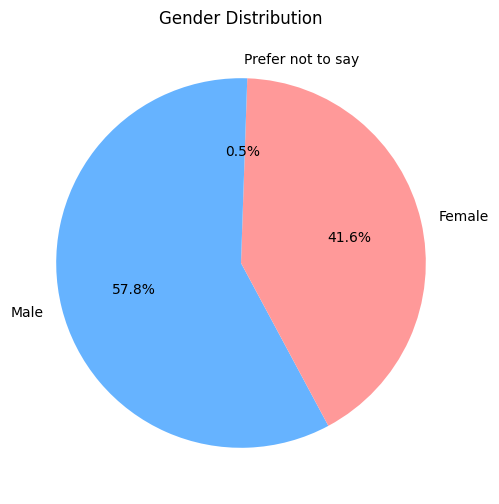

In [72]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

### **Age Distribution**

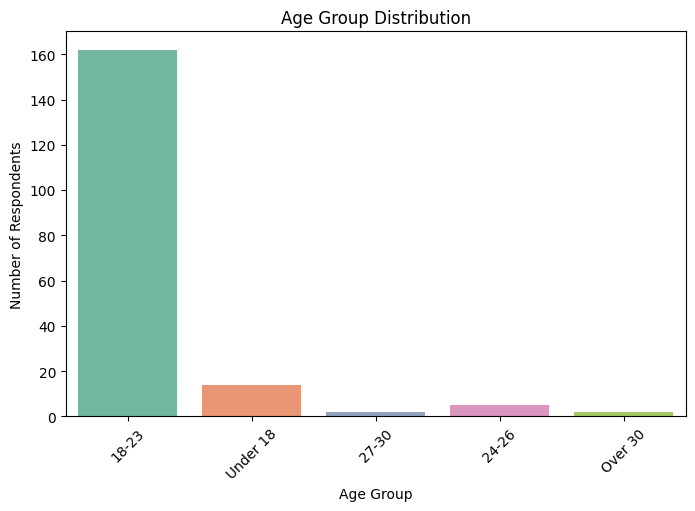

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(x='age', data=df, palette='Set2')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

### **Schedule Type Preference**

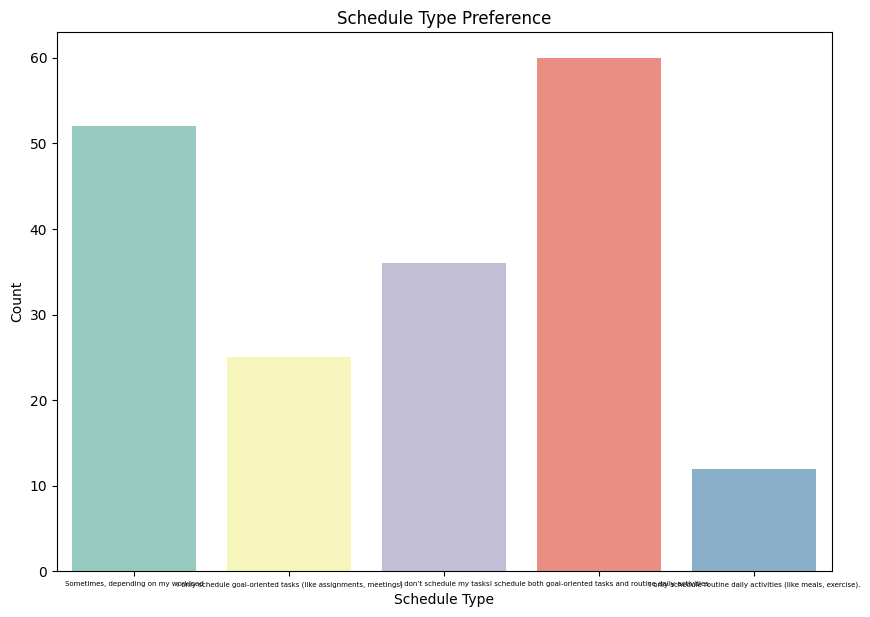

In [74]:
plt.figure(figsize=(10, 7)) # Example: Increase the size
sns.countplot(x='schedule_type', data=df, palette='Set3')
plt.title("Schedule Type Preference")
plt.xlabel("Schedule Type")
plt.ylabel("Count")
plt.xticks(fontsize=5)
plt.show()

### **Occupation Distribution**

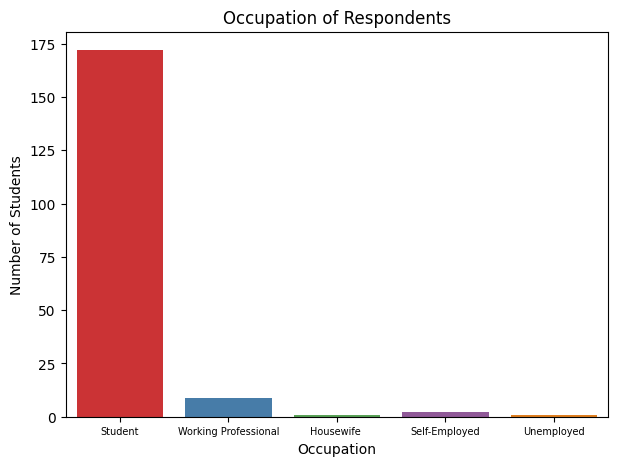

In [75]:
plt.figure(figsize=(7, 5))
sns.countplot(x='occupation', data=df, palette='Set1')
plt.title("Occupation of Respondents")
plt.xlabel("Occupation")
plt.ylabel("Number of Students")
plt.xticks(fontsize = 7)
plt.show()

## **5. Main Observations (Hypothesis Tests)**

### 📌 **Observation 1: Schedule Type vs. Productivity**



#### Statistical Test

In [76]:
# Group 1: Fixed schedule
fixed = df[df['preferred_schedule'].str.strip().str.lower() == 'fixed']

# Group 2: Flexible or Hybrid
flexible_hybrid = df[df['preferred_schedule'].str.strip().str.lower().isin(['flexible', 'hybrid (combination of fixed and flexible)'])]

In [77]:
fixed['productivity'].to_list()

[2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 3, 4, 1, 2, 3, 3, 2, 4, 4, 2, 2, 1, 1, 1, 4]

In [82]:
import pandas as pd
from scipy import stats

# Assuming df is your cleaned DataFrame from earlier

# Extract data as lists
fixedProductivity = df[df['preferred_schedule'].str.strip().str.lower() == 'fixed']['productivity'].tolist()
flexibleProductivity = df[df['preferred_schedule'].str.strip().str.lower().isin(['flexible', 'hybrid (combination of fixed and flexible)'])]['productivity'].tolist()

# Shapiro-Wilk test for normality
shapiro_fixed = stats.shapiro(fixedProductivity)
shapiro_flexible = stats.shapiro(flexibleProductivity)
print("Shapiro-Wilk Test Fixed group:", shapiro_fixed)
print("Shapiro-Wilk Test Flexible group:", shapiro_flexible)

# Levene's test for equal variances
levene_test = stats.levene(fixedProductivity, flexibleProductivity)
print("Levene's Test:", levene_test)

# Independent Samples t-test
equal_var_flag = True if levene_test.pvalue > 0.05 else False
t_stat, p_val = stats.ttest_ind(fixedProductivity, flexibleProductivity, equal_var=equal_var_flag)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Conclusion
alpha = 0.05
if shapiro_fixed.pvalue < alpha or shapiro_flexible.pvalue < alpha:
    print("⚠️ Warning: Normality assumption may be violated.")
else:
    print("✅ Normality assumption holds.")

if levene_test.pvalue < alpha:
    print("⚠️ Variances are unequal - using Welch's t-test.")
else:
    print("✅ Variances are equal.")

if p_val < alpha:
    print("✅ Reject null hypothesis: Productivity significantly different between schedule types.")
else:
    print("❌ Fail to reject null hypothesis: No significant productivity difference between schedule types.")


Shapiro-Wilk Test Fixed group: ShapiroResult(statistic=np.float64(0.8365041401139972), pvalue=np.float64(0.0009868737795018137))
Shapiro-Wilk Test Flexible group: ShapiroResult(statistic=np.float64(0.8568147617816878), pvalue=np.float64(3.40379805099876e-11))
Levene's Test: LeveneResult(statistic=np.float64(1.4840643252441321), pvalue=np.float64(0.22470796432828144))
T-statistic: 0.16120082349460063
P-value: 0.872113056648266
⚠️ Warning: Normality assumption may be violated.
✅ Variances are equal.
❌ Fail to reject null hypothesis: No significant productivity difference between schedule types.


#### Summary of Observation
**Test Type:** Independent Samples T-Test  
**Groups:** Students with Fixed Schedules vs. Flexible/Hybrid Schedules  

**Hypotheses:**  
- **H₀ (Null):** μ₁ = μ₂ → Mean productivity is the same across both groups  
- **H₁ (Alternate):** μ₁ ≠ μ₂ → Mean productivity differs across groups  

---

**Assumption Checks:**  
- 🔍 **Shapiro-Wilk Test (Normality):**  
  - Fixed Group p = 0.001 ❌  
  - Flexible Group p ≈ 3.403 ❌  
  *Conclusion: Both groups violate the normality assumption*

- ⚖️ **Levene's Test (Equal Variance):**  
  - p = 0.8721 ✅  
  *Conclusion: Equal variances can be assumed*

---

**T-Test Result:**  
- **T-statistic:** 0.161  
- **P-value:** 0.872  
- **Conclusion:**  
  - Since **p > 0.05**, we **fail to reject the null hypothesis**.
  - There is **no statistically significant difference** in productivity between students with fixed and flexible/hybrid schedules.

#### Visualization

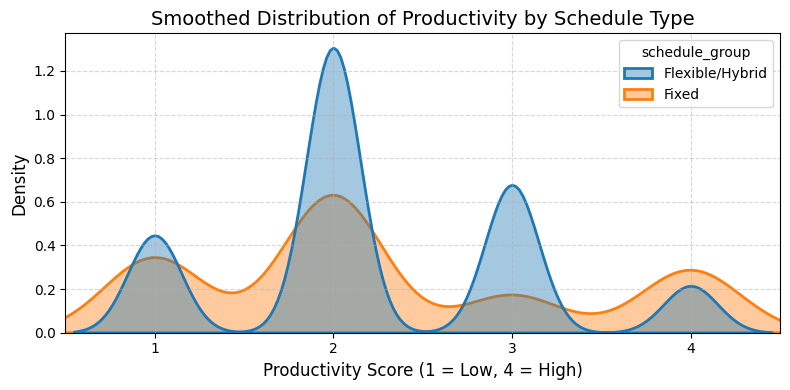

In [86]:

# Filter and clean schedule data
df_plot = df[df['preferred_schedule'].str.strip().str.lower().isin([
    'fixed', 'flexible', 'hybrid (combination of fixed and flexible)'
])].copy()

df_plot['preferred_schedule'] = df_plot['preferred_schedule'].str.strip().str.title()
df_plot['schedule_group'] = df_plot['preferred_schedule'].replace({
    'Hybrid (Combination Of Fixed And Flexible)': 'Flexible/Hybrid',
    'Flexible': 'Flexible/Hybrid',
    'Fixed': 'Fixed'
})

# Plot KDE
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df_plot,
    x='productivity',
    hue='schedule_group',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=0.5,  # Tune this for sharper curves (since data is discrete)
    linewidth=2
)

# Aesthetics
plt.title("Smoothed Distribution of Productivity by Schedule Type", fontsize=14)
plt.xlabel("Productivity Score (1 = Low, 4 = High)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xlim(0.5, 4.5)  # Restrict to valid score range
plt.xticks([1, 2, 3, 4])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### 📌 **Observation 2: Schedule Control vs. Satisfaction**



#### Statistical Test

In [81]:
from scipy import stats

# Define α
alpha = 0.05

# Group 1: Full control
full_control = df[df['schedule_control'].str.strip().str.lower() == 'always (i can adjust my schedule anytime)']['scheduling_satisfaction'].tolist()

# Group 2: Limited control (everyone else)
limited_control = df[df['schedule_control'].str.strip().str.lower() != 'always (i can adjust my schedule anytime)']['scheduling_satisfaction'].tolist()

# Step 1: Shapiro-Wilk test for normality
shapiro_full = stats.shapiro(full_control)
shapiro_limited = stats.shapiro(limited_control)
print("Shapiro-Wilk Test (Full Control):", shapiro_full)
print("Shapiro-Wilk Test (Limited Control):", shapiro_limited)

# Step 2: Levene's test for equal variances
levene_test = stats.levene(full_control, limited_control)
print("Levene's Test:", levene_test)

# Step 3: T-test (use equal_var flag)
equal_var = levene_test.pvalue > alpha
t_stat, p_val_two_tailed = stats.ttest_ind(full_control, limited_control, equal_var=equal_var)

# Since H₁: μ₁ > μ₂, convert to one-tailed p-value
p_val_one_tailed = p_val_two_tailed / 2

print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {p_val_one_tailed}")

# Step 4: Interpret Assumptions
if shapiro_full.pvalue < alpha or shapiro_limited.pvalue < alpha:
    print("⚠️ Warning: Normality assumption may be violated.")
else:
    print("✅ Normality assumption holds.")

if equal_var:
    print("✅ Variances are equal.")
else:
    print("⚠️ Variances are unequal - using Welch’s correction.")

# Step 5: Conclusion
if (t_stat > 0) and (p_val_one_tailed < alpha):
    print("✅ Reject H₀: Students with full control report significantly higher satisfaction.")
else:
    print("❌ Fail to reject H₀: No significant difference in satisfaction.")


Shapiro-Wilk Test (Full Control): ShapiroResult(statistic=np.float64(0.786129898877488), pvalue=np.float64(1.8296140871285868e-06))
Shapiro-Wilk Test (Limited Control): ShapiroResult(statistic=np.float64(0.8332867623669296), pvalue=np.float64(2.099379535693925e-11))
Levene's Test: LeveneResult(statistic=np.float64(0.27810513793380304), pvalue=np.float64(0.598584625944382))
T-statistic: 3.100336647401516
One-tailed P-value: 0.001119375332634135
⚠️ Warning: Normality assumption may be violated.
✅ Variances are equal.
✅ Reject H₀: Students with full control report significantly higher satisfaction.


#### Summary of Observation

**Test Type:** One-Tailed Independent Samples T-Test  
**Groups:**  
- **Group 1:** Students with full control over their schedule  
- **Group 2:** Students with limited or no control  

---

**Hypotheses:**  
- **H₀ (Null):** μ₁ = μ₂ → No difference in satisfaction levels  
- **H₁ (Alternate):** μ₁ > μ₂ → Students with full control report higher satisfaction

---

**Assumption Checks:**  
- 🔍 **Normality (Shapiro-Wilk):**  
  - Full Control group: p = 1.82e-06 ❌  
  - Limited Control group: p ≈ 2.01e-11 ❌  
  ➤ *Normality assumption is violated*

- ⚖️ **Levene’s Test for Equal Variances:**  
  - p = 0.5986 ✅  
  ➤ *Equal variances assumed*

---

**T-Test Results:**  
- **T-statistic:** 3.10  
- **One-tailed P-value:** 0.00112

**Conclusion:**  
✅ Since **p < 0.05** and **T > 0**, we **reject the null hypothesis**.  
**Students with full control over their schedule report significantly higher satisfaction** compared to those with limited or no control.


#### Visualization

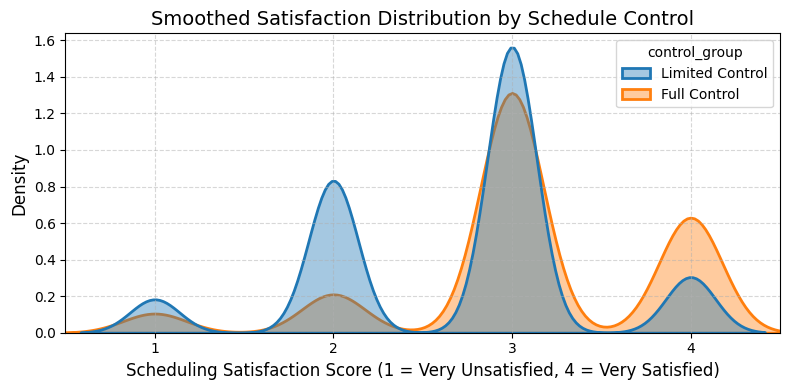

In [85]:
# Filter and categorize schedule control groups
df_plot = df[df['schedule_control'].notnull()].copy()
df_plot['control_group'] = df_plot['schedule_control'].str.strip().str.lower().apply(
    lambda x: 'Full Control' if x == 'always (i can adjust my schedule anytime)' else 'Limited Control'
)

# Plot KDE
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df_plot,
    x='scheduling_satisfaction',
    hue='control_group',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=0.5,  # sharper KDE for ordinal scale
    linewidth=2
)

# Aesthetics
plt.title("Smoothed Satisfaction Distribution by Schedule Control", fontsize=14)
plt.xlabel("Scheduling Satisfaction Score (1 = Very Unsatisfied, 4 = Very Satisfied)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xlim(0.5, 4.5)
plt.xticks([1, 2, 3, 4])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 📌 **Observation 3: Planning Method vs. Schedule Effectiveness**



#### Statistical Test

In [84]:
from scipy import stats

# Define α
alpha = 0.05

# Group 1: To-do list users
todo_users = df[df['planning_method'].str.strip().str.lower() != 'no formal planning']['schedule_effectiveness'].dropna().tolist()

# Group 2: No formal planning
no_plan_users = df[df['planning_method'].str.strip().str.lower() == 'no formal planning']['schedule_effectiveness'].dropna().tolist()

# Shapiro-Wilk tests for normality
shapiro_todo = stats.shapiro(todo_users)
shapiro_noplan = stats.shapiro(no_plan_users)
print("Shapiro-Wilk Test (To-do users):", shapiro_todo)
print("Shapiro-Wilk Test (No-plan users):", shapiro_noplan)

# Levene's test for variance equality
levene_test = stats.levene(todo_users, no_plan_users)
print("Levene's Test:", levene_test)

# T-test (right-tailed / one-sided)
equal_var = levene_test.pvalue > alpha
t_stat, p_val_two_tailed = stats.ttest_ind(todo_users, no_plan_users, equal_var=equal_var)
p_val_one_tailed = p_val_two_tailed / 2

print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {p_val_one_tailed}")

# Assumption check summaries
if shapiro_todo.pvalue < alpha or shapiro_noplan.pvalue < alpha:
    print("⚠️ Normality assumption may be violated.")
else:
    print("✅ Normality assumption holds.")

if equal_var:
    print("✅ Variances are equal.")
else:
    print("⚠️ Variances are unequal - using Welch's correction.")

# Final test decision
if t_stat > 0 and p_val_one_tailed < alpha:
    print("✅ Reject H₀: To-do list users are significantly more effective.")
else:
    print("❌ Fail to reject H₀: No significant difference in effectiveness.")


Shapiro-Wilk Test (To-do users): ShapiroResult(statistic=np.float64(0.8058277434383592), pvalue=np.float64(1.0047894552378917e-09))
Shapiro-Wilk Test (No-plan users): ShapiroResult(statistic=np.float64(0.8007426886064337), pvalue=np.float64(8.161295879663949e-10))
Levene's Test: LeveneResult(statistic=np.float64(0.005629383024025506), pvalue=np.float64(0.9402734225320913))
T-statistic: 2.4828454728050557
One-tailed P-value: 0.006967062780030936
⚠️ Normality assumption may be violated.
✅ Variances are equal.
✅ Reject H₀: To-do list users are significantly more effective.


#### Summary of Observation

**Test Type:** One-Tailed Independent Samples T-Test  
**Groups:**  
- **Group 1:** Students who use structured planning (to-do lists)  
- **Group 2:** Students who do not use any formal planning method  

---

**Hypotheses:**  
- **H₀ (Null):** μ₁ = μ₂ → Planning method does not affect effectiveness  
- **H₁ (Alternate):** μ₁ > μ₂ → To-do list users feel more effective

---

**Assumption Checks:**  
- 🔍 **Shapiro-Wilk Test (Normality):**  
  - To-do list users: p = 1.01e-9 ❌  
  - No-plan users: p = 8.16e-10 ❌  
  ➤ *Normality assumption is violated*

- ⚖️ **Levene’s Test for Equal Variance:**  
  - p = 0.941 ✅  
  ➤ *Equal variances assumed*

---

**T-Test Results:**  
- **T-statistic:** 2.4828
- **One-tailed P-value:** 0.0069

---

**Conclusion:**  
✅ Since **p < 0.05** and **T > 0**, we **reject the null hypothesis**.  
**Students who use structured planning methods (e.g., to-do lists) report significantly higher schedule effectiveness** than those who do not.



#### Visualization

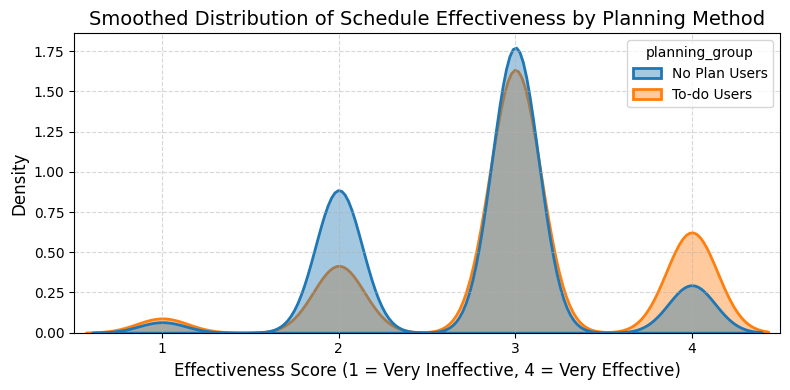

In [88]:
# Prepare plot-friendly DataFrame
df_plot = df[df['schedule_effectiveness'].notnull()].copy()
df_plot['planning_group'] = df_plot['planning_method'].str.strip().str.lower().apply(
    lambda x: 'To-do Users' if x != 'no formal planning' else 'No Plan Users'
)

# KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df_plot,
    x='schedule_effectiveness',
    hue='planning_group',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=0.5,
    linewidth=2
)

# Chart styling
plt.title("Smoothed Distribution of Schedule Effectiveness by Planning Method", fontsize=14)
plt.xlabel("Effectiveness Score (1 = Very Ineffective, 4 = Very Effective)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xlim(0.5, 4.5)
plt.xticks([1, 2, 3, 4])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📌 **Observation 4: Schedule Type vs. Healthy Lifestyle**


#### Statistical Analysis

In [87]:
import math
from scipy.stats import norm

# Group 1: Fixed schedule
fixed = df[df['preferred_schedule'].str.strip().str.lower() == 'fixed']

# Group 2: Flexible or Hybrid
flexible_hybrid = df[df['preferred_schedule'].str.strip().str.lower().isin(['flexible', 'hybrid (combination of fixed and flexible)'])]

# Group 3: Fixed with healthy Lifestyle
fixed_healthy = df[(df['preferred_schedule'].str.strip().str.lower() == 'fixed') & (df['healthy'] == 1)]

# Group 3: Flexible with healthy Lifestyle
flexible_healthy= df[df['preferred_schedule'].str.strip().str.lower().isin(['flexible', 'hybrid (combination of fixed and flexible)']) & (df['healthy'] == 1)]

# Total students in each group
n1 = len(fixed)
n2 = len(flexible_hybrid)

# Count of students reporting healthy lifestyle
x1 = len(fixed_healthy)
x2 = len(flexible_healthy)

# Step 2: Proportions
p_hat1 = x1 / n1  # Fixed
p_hat2 = x2 / n2  # Flexible+Hybrid

# Step 3: Pooled Proportion
p_c = (x1 + x2) / (n1 + n2)
qc = 1 - p_c

# Step 4: Standard Error
se = math.sqrt(p_c * qc * (1/n1 + 1/n2))

# Step 5: Z-statistic
z_cal = (p_hat1 - p_hat2) / se  # H1: p2 > p1 (flexible > fixed)

# Step 6: Critical value (one-tailed test)
alpha = 0.05
critical_value = norm.ppf(1 - alpha)  # one-tailed

# Output
print("Fixed group size:", n1, "Healthy count:", x1)
print("Flexible+Hybrid group size:", n2, "Healthy count:", x2)
print(f"Flexible+Hybrid Healthy Rate: {p_hat2:.3f}")
print(f"Fixed Healthy Rate: {p_hat1:.3f}")
print(f"Z-statistic: {z_cal:.3f}")
print(f"Critical Z (one-tailed): {critical_value:.3f}")

# Decision
if z_cal > critical_value:
    print("✅ Reject H₀: Flexible schedule students are significantly more likely to lead a healthy lifestyle.")
else:
    print("❌ Fail to reject H₀: No significant difference in healthy habits.")


Fixed group size: 25 Healthy count: 22
Flexible+Hybrid group size: 160 Healthy count: 122
Flexible+Hybrid Healthy Rate: 0.762
Fixed Healthy Rate: 0.880
Z-statistic: 1.315
Critical Z (one-tailed): 1.645
❌ Fail to reject H₀: No significant difference in healthy habits.


#### Summary of Observation

**Test Type:** One-Tailed Proportion Z-Test  
**Groups:**  
- **Group 1:** Students with Fixed schedules  
- **Group 2:** Students with Flexible or Hybrid schedules  

**Measured:** Whether students report following a healthy lifestyle (diet and/or exercise)

---

**Hypotheses:**  
- **H₀ (Null):** p₁ = p₂ → No difference in healthy lifestyle proportions between groups  
- **H₁ (Alternate):** p₂ > p₁ → Flexible/Hybrid students are healthier

---

**Sample Statistics:**  
- Fixed group: n = 25, healthy = 22 → **p̂₁ = 0.880**  
- Flexible/Hybrid group: n = 160, healthy = 122 → **p̂₂ = 0.763**  
- Pooled Proportion: p = (22 + 122) / (25 + 160) = 0.779  
- Standard Error: Computed using pooled variance  
- **Z-statistic:** 1.315  
- **Critical Z (α = 0.05, one-tailed):** 1.645

---

**Conclusion:**  
❌ Since **Z = 1.315 < 1.645**, we **fail to reject the null hypothesis**.  
There is **no statistically significant difference** in healthy lifestyle habits between students with fixed and flexible/hybrid schedules.

> Although fixed-schedule students had a slightly higher proportion of healthy habits (88%) than flexible/hybrid students (76.3%), the difference is not statistically significant at the 5% level.


#### Visualization

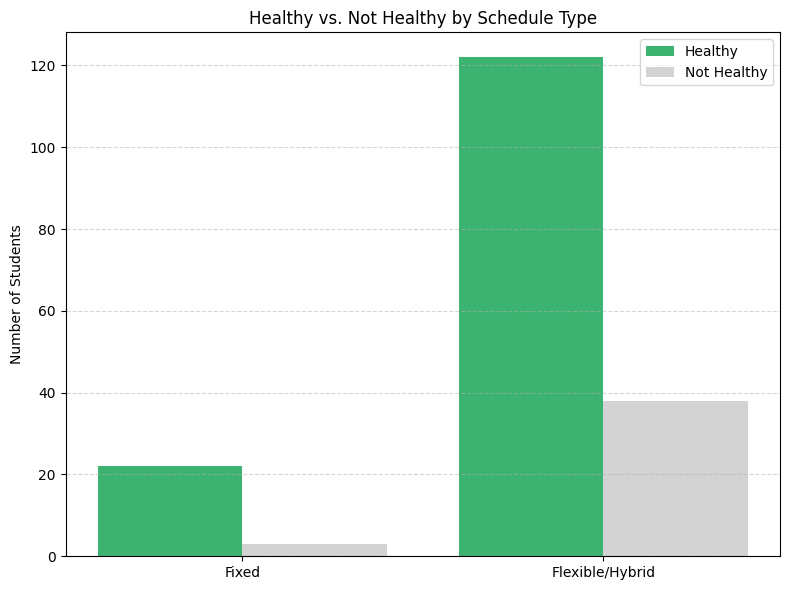

In [19]:
import numpy as np

labels = ['Fixed', 'Flexible/Hybrid']
healthy = [x1, x2]
not_healthy = [n1 - x1, n2 - x2]

x = np.arange(len(labels))
width = 0.4

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, healthy, width, label='Healthy', color='mediumseagreen')
plt.bar(x + width/2, not_healthy, width, label='Not Healthy', color='lightgray')

plt.xticks(x, labels)
plt.ylabel('Number of Students')
plt.title('Healthy vs. Not Healthy by Schedule Type')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 📌 **Observation 5: AI Tool Usage vs. Scheduling Satisfaction**

#### Statistical Analysis

In [20]:
import math
from scipy.stats import norm

# Step 1: Grouping based on AI Tool Usage
ai_users = df[df['ai_tool_use'].str.strip().str.lower() == 'yes']
non_ai_users = df[df['ai_tool_use'].str.strip().str.lower() != 'yes']

# Step 2: Filter satisfied students (1 = satisfied, already defined in data cleaning)
ai_satisfied = ai_users[ai_users['satisfied'] == 1]
non_ai_satisfied = non_ai_users[non_ai_users['satisfied'] == 1]

# Step 3: Counts
n1 = len(ai_users)
x1 = len(ai_satisfied)

n2 = len(non_ai_users)
x2 = len(non_ai_satisfied)

# Step 4: Proportions
p_hat1 = x1 / n1  # AI users
p_hat2 = x2 / n2  # Non-users

# Step 5: Pooled Proportion
p_c = (x1 + x2) / (n1 + n2)
qc = 1 - p_c

# Step 6: Standard Error
se = math.sqrt(p_c * qc * (1/n1 + 1/n2))

# Step 7: Z-statistic
z_cal = (p_hat1 - p_hat2) / se

# Step 8: Critical Z-value for one-tailed test
alpha = 0.05
critical_value = norm.ppf(1 - alpha)

# Step 9: Output
print("AI Tool Users Total:", n1, "| Satisfied:", x1)
print("Non-AI Users Total:", n2, "| Satisfied:", x2)
print(f"AI Satisfaction Rate (p̂₁): {p_hat1:.3f}")
print(f"Non-AI Satisfaction Rate (p̂₂): {p_hat2:.3f}")
print(f"Z-statistic: {z_cal:.3f}")
print(f"Critical Z (one-tailed, α=0.05): {critical_value:.3f}")

# Step 10: Conclusion
if z_cal > critical_value:
    print("✅ Reject H₀: AI tool users are significantly more satisfied with scheduling.")
else:
    print("❌ Fail to reject H₀: No significant difference in satisfaction between groups.")


AI Tool Users Total: 63 | Satisfied: 47
Non-AI Users Total: 122 | Satisfied: 82
AI Satisfaction Rate (p̂₁): 0.746
Non-AI Satisfaction Rate (p̂₂): 0.672
Z-statistic: 1.037
Critical Z (one-tailed, α=0.05): 1.645
❌ Fail to reject H₀: No significant difference in satisfaction between groups.


#### Summary of Observations

**Test Type:** One-Tailed Proportion Z-Test  
**Groups:**  
- **Group 1:** Students who use AI tools for scheduling  
- **Group 2:** Students who do not use AI tools  

**Measured:** Whether students are satisfied with their schedules (Satisfied or Very Satisfied)

---

**Hypotheses:**  
- **H₀ (Null):** p₁ = p₂ → AI tool usage does not affect satisfaction  
- **H₁ (Alternate):** p₁ > p₂ → AI users are more satisfied

---

**Sample Statistics:**  
- **AI Tool Users:** n = 63, satisfied = 47 → p̂₁ = 0.746  
- **Non-AI Users:** n = 122, satisfied = 82 → p̂₂ = 0.672  
- **Pooled Proportion:** p = (47 + 82) / (63 + 122) = 0.699  
- **Standard Error:** Calculated from pooled variance  
- **Z-statistic:** 1.037  
- **Critical Z (α = 0.05, one-tailed):** 1.645

---

**Conclusion:**  
❌ Since **Z = 1.037 < 1.645**, we **fail to reject the null hypothesis**.  
There is **no statistically significant difference** in scheduling satisfaction between students who use AI tools and those who don’t.

> Although AI tool users had a slightly higher satisfaction rate (74.6%) compared to non-users (67.2%), this difference is not statistically significant at the 5% level.


#### Visualization

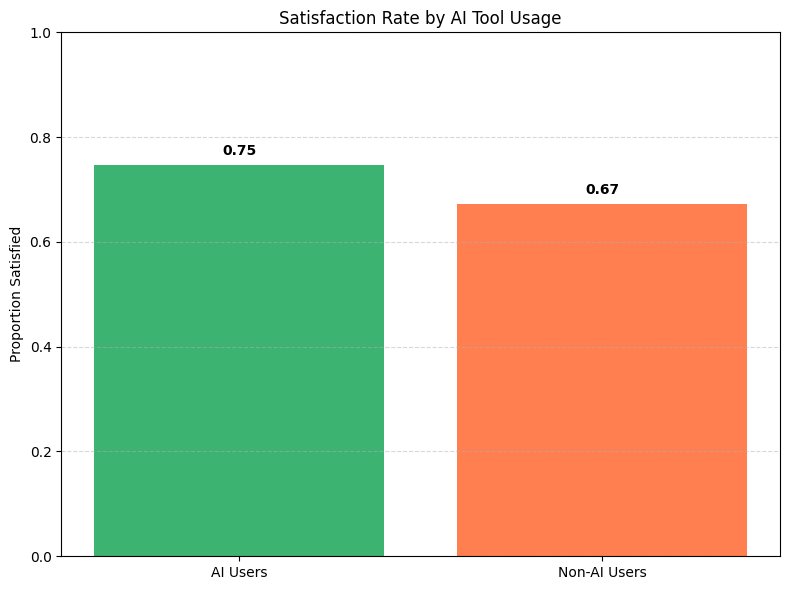

In [21]:
import matplotlib.pyplot as plt

labels = ['AI Users', 'Non-AI Users']
proportions = [p_hat1, p_hat2]
colors = ['mediumseagreen', 'coral']

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=colors)
plt.ylim(0, 1)
plt.ylabel('Proportion Satisfied')
plt.title('Satisfaction Rate by AI Tool Usage')
for i, v in enumerate(proportions):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **📌Observation 6: Schedule Type vs. Work-Life Balance**

#### Statistical Analysis

In [93]:
balance_map = {
    "Very Unsatisfied": 1,
    "Unsatisfied": 2,
    "Satisfied": 3,
    "Very Satisfied": 4
}

df['work_life_balance_score'] = df['work_life_balance'].map(balance_map)

fixed = df[df['preferred_schedule'].str.strip().str.lower() == 'fixed']['work_life_balance_score'].dropna()
flexible = df[df['preferred_schedule'].str.strip().str.lower().isin(['flexible', 'hybrid (combination of fixed and flexible)'])]['work_life_balance_score'].dropna()

In [94]:
from scipy import stats

# Shapiro-Wilk tests
shapiro_fixed = stats.shapiro(fixed)
shapiro_flexible = stats.shapiro(flexible)
print("Shapiro-Wilk Test (Fixed):", shapiro_fixed)
print("Shapiro-Wilk Test (Flexible/Hybrid):", shapiro_flexible)

# Levene's test
levene_test = stats.levene(fixed, flexible)
print("Levene's Test:", levene_test)

# T-test
equal_var_flag = levene_test.pvalue > 0.05
t_stat, p_val = stats.ttest_ind(fixed, flexible, equal_var=equal_var_flag)
one_tailed_p = p_val / 2
print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {one_tailed_p}")

# Output Interpretation
alpha = 0.05

if shapiro_fixed.pvalue < alpha or shapiro_flexible.pvalue < alpha:
    print("⚠️ Normality assumption may be violated.")
else:
    print("✅ Normality assumption holds.")

if levene_test.pvalue >= alpha:
    print("✅ Variances are equal.")
else:
    print("⚠️ Variances may not be equal.")

if one_tailed_p < alpha:
    print("✅ Reject H₀: Flexible schedule students have significantly better work-life balance.")
else:
    print("❌ Fail to reject H₀: No significant difference in work-life balance.")

Shapiro-Wilk Test (Fixed): ShapiroResult(statistic=np.float64(0.8600834708239681), pvalue=np.float64(0.0027534672844426104))
Shapiro-Wilk Test (Flexible/Hybrid): ShapiroResult(statistic=np.float64(0.7895886628735032), pvalue=np.float64(6.787587025798249e-14))
Levene's Test: LeveneResult(statistic=np.float64(2.3308480894687804), pvalue=np.float64(0.128559250731153))
T-statistic: 1.4537582639449418
One-tailed P-value: 0.07386307497377245
⚠️ Normality assumption may be violated.
✅ Variances are equal.
❌ Fail to reject H₀: No significant difference in work-life balance.


#### Summary of Observation

**Test Type:** One-Tailed Independent Samples T-Test  
**Groups Compared:**  
- Group 1: Students who prefer **Fixed** schedules  
- Group 2: Students who prefer **Flexible/Hybrid** schedules

---

**Hypotheses:**  
- **H₀ (Null Hypothesis):** Students’ work-life balance is the same across schedule types  
- **H₁ (Alternate Hypothesis):** Students with flexible schedules report better work-life balance

---

**Results:**

- Shapiro-Wilk Test (Fixed): `stat = 0.860`, `p = 0.00275`  
- Shapiro-Wilk Test (Flexible/Hybrid): `stat = 0.790`, `p ≈ 6.79e-14`  
- Levene's Test: `stat = 2.331`, `p = 0.129`  
- T-statistic: `1.454`  
- One-tailed P-value: `0.0739`

---

**Conclusion:**  
⚠️ *Normality assumption may be violated*  
✅ *Variances are equal*  
❌ *Fail to reject H₀: No statistically significant difference in work-life balance between schedule types*


#### Visualization

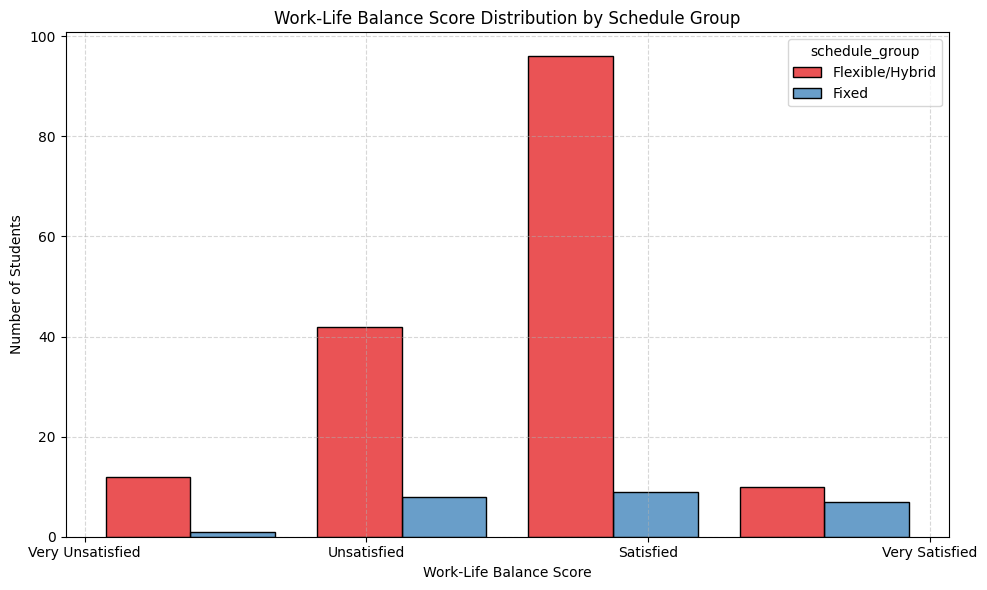

In [96]:

df_plot = df[df['work_life_balance_score'].notnull()].copy()
df_plot['schedule_group'] = df_plot['preferred_schedule'].str.strip().str.lower().replace({
    'hybrid (combination of fixed and flexible)': 'flexible/hybrid',
    'flexible': 'flexible/hybrid',
    'fixed': 'fixed'
}).str.title()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_plot,
    x='work_life_balance_score',
    hue='schedule_group',
    bins=4,
    multiple='dodge',
    shrink=0.8,
    palette='Set1'
)
plt.title("Work-Life Balance Score Distribution by Schedule Group")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Number of Students")
plt.xticks([1, 2, 3, 4], ['Very Unsatisfied', 'Unsatisfied', 'Satisfied', 'Very Satisfied'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **📌Observation 7: Flexibility Importance vs. Scheduling Satisfaction**

#### Statistical Analysis

In [97]:
# Grouping students
df['flex_importance'] = df['flexibility_importance'].str.strip().str.lower()

# High Importance Group
high_flex = df[df['flex_importance'] == 'extremely important']['scheduling_satisfaction'].dropna()

# Low Importance Group
low_flex = df[df['flex_importance'] != 'extremely important']['scheduling_satisfaction'].dropna()


In [98]:
high_flex.sample(10)

,scheduling_satisfaction
158,3
125,3
70,3
65,3
5,3
116,3
89,4
68,2
13,3
177,1


In [100]:
from scipy import stats

# Shapiro-Wilk Test
shapiro_high = stats.shapiro(high_flex)
shapiro_low = stats.shapiro(low_flex)
print("Shapiro-Wilk Test (High Importance):", shapiro_high)
print("Shapiro-Wilk Test (Low Importance):", shapiro_low)

# Levene’s Test
levene_test = stats.levene(high_flex, low_flex)
print("Levene’s Test:", levene_test)

# One-tailed T-Test
equal_var = levene_test.pvalue > 0.05
t_stat, p_val = stats.ttest_ind(high_flex, low_flex, equal_var=equal_var)
one_tailed_p = p_val / 2

print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {one_tailed_p}")

alpha = 0.05

if shapiro_high.pvalue < alpha or shapiro_low.pvalue < alpha:
    print("⚠️ Normality assumption may be violated.")
else:
    print("✅ Normality assumption holds.")

if levene_test.pvalue >= alpha:
    print("✅ Variances are equal.")
else:
    print("⚠️ Variances may not be equal.")

# Interpretation
if one_tailed_p < alpha:
    print("✅ Reject H₀: High-flexibility students report significantly higher satisfaction.")
else:
    print("❌ Fail to reject H₀: No significant difference in scheduling satisfaction.")


Shapiro-Wilk Test (High Importance): ShapiroResult(statistic=np.float64(0.8583490958677273), pvalue=np.float64(0.00024803849541470884))
Shapiro-Wilk Test (Low Importance): ShapiroResult(statistic=np.float64(0.8232158128633837), pvalue=np.float64(4.4174911620948954e-12))
Levene’s Test: LeveneResult(statistic=np.float64(4.820487804878049), pvalue=np.float64(0.029381204835731704))
T-statistic: -2.6238159058368007
One-tailed P-value: 0.005783190785001243
⚠️ Normality assumption may be violated.
⚠️ Variances may not be equal.
✅ Reject H₀: High-flexibility students report significantly higher satisfaction.


#### Summary of Observation

**Test Type:** One-Tailed Independent Samples T-Test  
**Groups:**  
- **Group 1:** Students with High Importance on Flexibility  
- **Group 2:** Students with Low Importance on Flexibility  

**Measured:** Work-life balance satisfaction scores

---

**Hypotheses:**  
- **H₀ (Null):** μ₁ = μ₂ → No difference in satisfaction between groups  
- **H₁ (Alternate):** μ₁ > μ₂ → High-flexibility students have higher satisfaction

---

**Test Results:**  
- **Shapiro-Wilk Normality Test:**  
  - High Importance: p = 0.00025 → ⚠️ Normality assumption violated  
  - Low Importance: p = 4.42e-12 → ⚠️ Normality assumption violated  
- **Levene’s Test for Equal Variances:** p = 0.029 → ⚠️ Variances are unequal  
- **T-statistic:** -2.62  
- **One-tailed P-value:** 0.0058  

---

**Conclusion:**  
✅ Reject H₀: Despite violations of normality and unequal variances,  there is **significant evidence** that students with high flexibility importance report different satisfaction levels compared to those with low importance.  


#### Visualization

## **6. Overall Summary**

In [101]:
summary = pd.DataFrame({
    'Observation': [
        'Schedule vs Productivity',
        'Control vs Satisfaction',
        'Planning vs Effectiveness',
        'Schedule vs Healthy Lifestyle',
        'AI Use vs Satisfaction',
        'Schedule vs Work-Life Balance',
        'Flexibility vs Satisfaction'
    ],
    'Test Type': ['T-test', 'T-test', 'T-test', 'Z-test', 'Z-test','T-Test','T-Test'],
    'p/Z Value': ['0.872', '0.0011', '0.0069', '1.315', '1.037','0.0738','0.0057'],
    'Conclusion': [
        'Fail to Reject H₀',
        'Reject H₀',
        'Reject H₀',
        'Fail to Reject H₀',
        'Fail to Reject H₀',
        'Fail to Reject H₀',
        'Reject H₀',
    ]
})
summary


,Observation,Test Type,p/Z Value,Conclusion
0,Schedule vs Productivity,T-test,0.872,Fail to Reject H₀
1,Control vs Satisfaction,T-test,0.0011,Reject H₀
2,Planning vs Effectiveness,T-test,0.0069,Reject H₀
3,Schedule vs Healthy Lifestyle,Z-test,1.315,Fail to Reject H₀
4,AI Use vs Satisfaction,Z-test,1.037,Fail to Reject H₀
5,Schedule vs Work-Life Balance,T-Test,0.0738,Fail to Reject H₀
6,Flexibility vs Satisfaction,T-Test,0.0057,Reject H₀


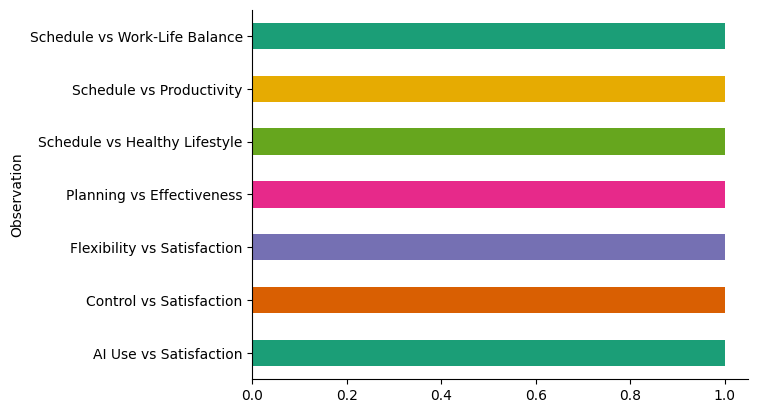

In [104]:
# @title Observation

from matplotlib import pyplot as plt
import seaborn as sns
summary.groupby('Observation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

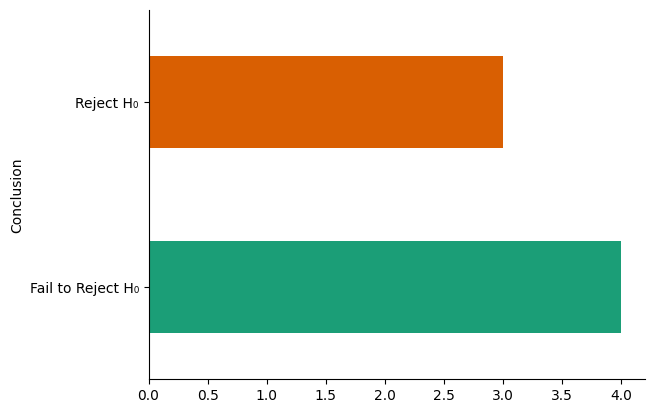

In [103]:
# @title Conclusion

from matplotlib import pyplot as plt
import seaborn as sns
summary.groupby('Conclusion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)